In [1]:
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [4]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()

df_DS_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
32,Data Scientist,Sr. Data Scientist (NLP) - Full-time / Part-time,"Dallas, TX",via Snagajob,Full-time,False,"Texas, United States",2023-03-13 13:07:03,False,True,United States,None,NaN,NaN,MCKESSON,"[python, azure, databricks, pyspark, pandas, h...","{'cloud': ['azure', 'databricks'], 'libraries'..."
40,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,None,NaN,NaN,Abbott,None,None
41,Data Scientist,Data Scientist I,"Paris, KY",via Jobs By Care,Full-time,False,Georgia,2023-11-13 14:59:39,False,False,United States,None,NaN,NaN,Appalachian Regional Healthcare,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785578,Data Scientist,"Data Scientist, Advanced Motor Technology","Newark, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-30 06:02:25,False,True,United States,None,NaN,NaN,Lucid Motors,"[go, python, sql, matlab, numpy, pandas, sciki...","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785651,Data Scientist,Data Scientist (Supply Chain Security),"Fort Belvoir, VA",via LinkedIn,Full-time,False,Georgia,2023-01-07 07:10:51,False,False,United States,None,NaN,NaN,Defense Logistics Agency,[go],{'programming': ['go']}
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None


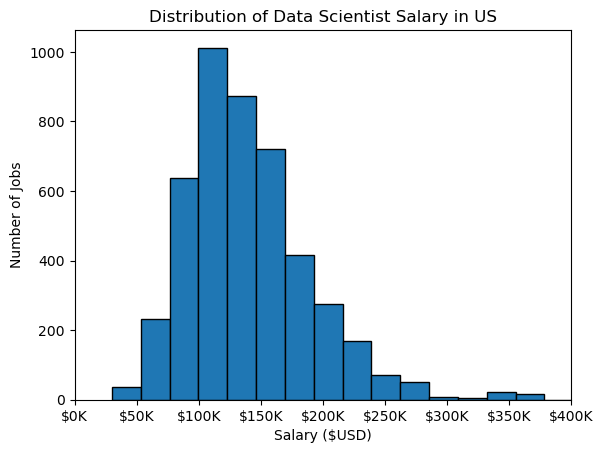

In [16]:
df_DS_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.title('Distribution of Data Scientist Salary in US')
plt.xlabel('Salary ($USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 400000)

ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))